<a href="https://colab.research.google.com/github/Vamshi-B558/OIBSIP-Data_Analytics/blob/main/Autocomplete_and_Autocorrect_Data_Analytics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/creditcard.csv')
df.shape

(3973, 31)

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,...,3973.000000,3973.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,1638.724138,-0.333723,0.308691,0.837062,0.013144,-0.029177,0.052836,0.146895,-0.071352,0.055778,...,0.010465,-0.082885,-0.058484,0.029106,0.095278,-0.012623,0.044638,0.002639,65.000101,0.000504
std,1016.577498,1.351976,1.180436,0.981057,1.418751,1.207632,1.286610,1.090769,1.294647,0.919087,...,0.855829,0.635482,0.391158,0.603965,0.405989,0.503818,0.352752,0.254136,213.688183,0.022437
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,...,-11.273890,-5.707801,-7.996811,-2.162523,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,750.000000,-1.030747,-0.155734,0.287224,-0.908469,-0.573740,-0.735876,-0.278697,-0.205430,-0.473894,...,-0.211812,-0.512434,-0.210615,-0.338940,-0.141891,-0.339998,-0.041461,-0.020983,2.265000,0.000000
50%,1526.000000,-0.451819,0.409641,0.884503,0.099497,-0.089809,-0.209577,0.162196,0.028639,0.032286,...,-0.053234,-0.064435,-0.069939,0.100635,0.108219,-0.025647,0.033751,0.021264,12.990000,0.000000
75%,2526.000000,1.070572,0.921588,1.433851,0.982710,0.396675,0.449217,0.635055,0.298866,0.622704,...,0.102520,0.345346,0.062502,0.432692,0.361309,0.288406,0.205736,0.087058,54.990000,0.000000
max,3624.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,...,15.631453,4.393846,4.095021,1.215279,1.727063,3.463246,3.852046,4.157934,7712.430000,1.000000


In [6]:
df.isnull().values.any()

True

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3973 non-null   int64  
 1   V1      3973 non-null   float64
 2   V2      3973 non-null   float64
 3   V3      3973 non-null   float64
 4   V4      3973 non-null   float64
 5   V5      3973 non-null   float64
 6   V6      3973 non-null   float64
 7   V7      3973 non-null   float64
 8   V8      3973 non-null   float64
 9   V9      3973 non-null   float64
 10  V10     3973 non-null   float64
 11  V11     3973 non-null   float64
 12  V12     3973 non-null   float64
 13  V13     3973 non-null   float64
 14  V14     3973 non-null   float64
 15  V15     3973 non-null   float64
 16  V16     3973 non-null   float64
 17  V17     3973 non-null   float64
 18  V18     3973 non-null   float64
 19  V19     3973 non-null   float64
 20  V20     3973 non-null   float64
 21  V21     3973 non-null   float64
 22  

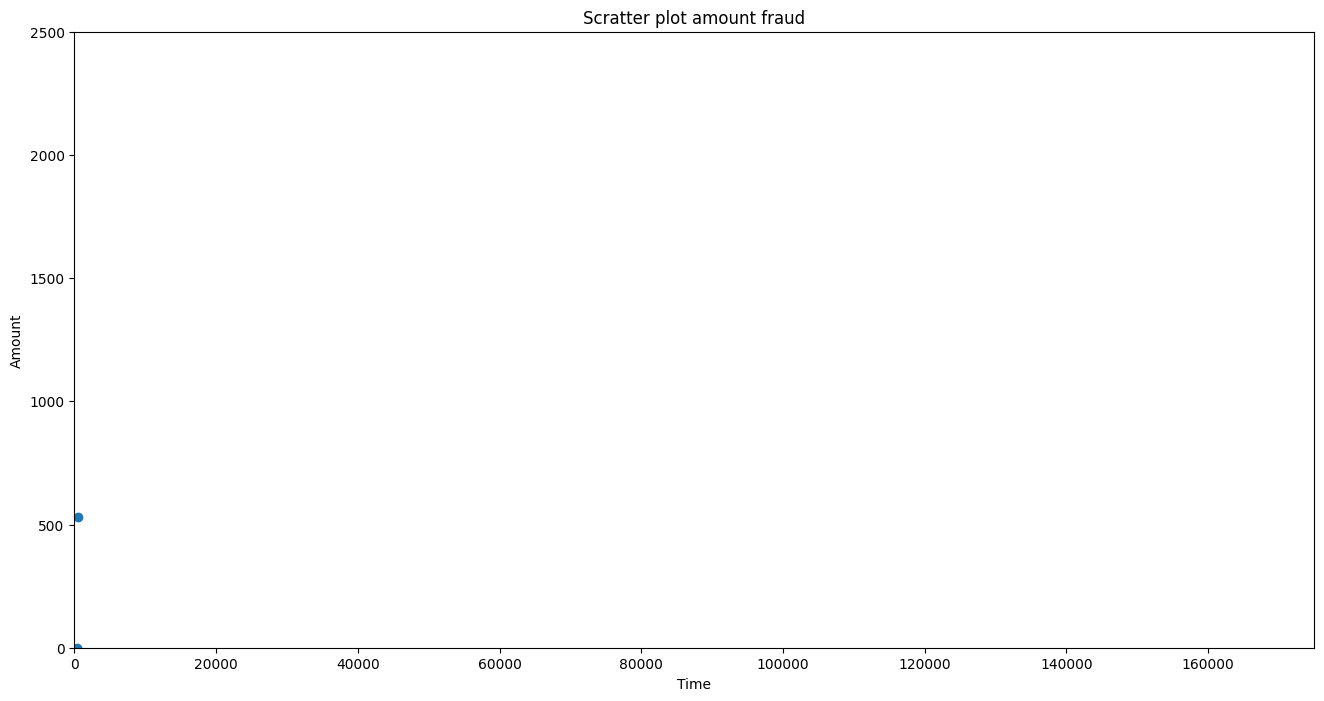

In [8]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(16,8))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [9]:
number_fraud = len(df[df.Class == 1])
number_no_fraud = len(df[df.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 2 frauds in the original dataset, even though there are 3970 no frauds in the dataset.


In [10]:
df_corr = df.corr()

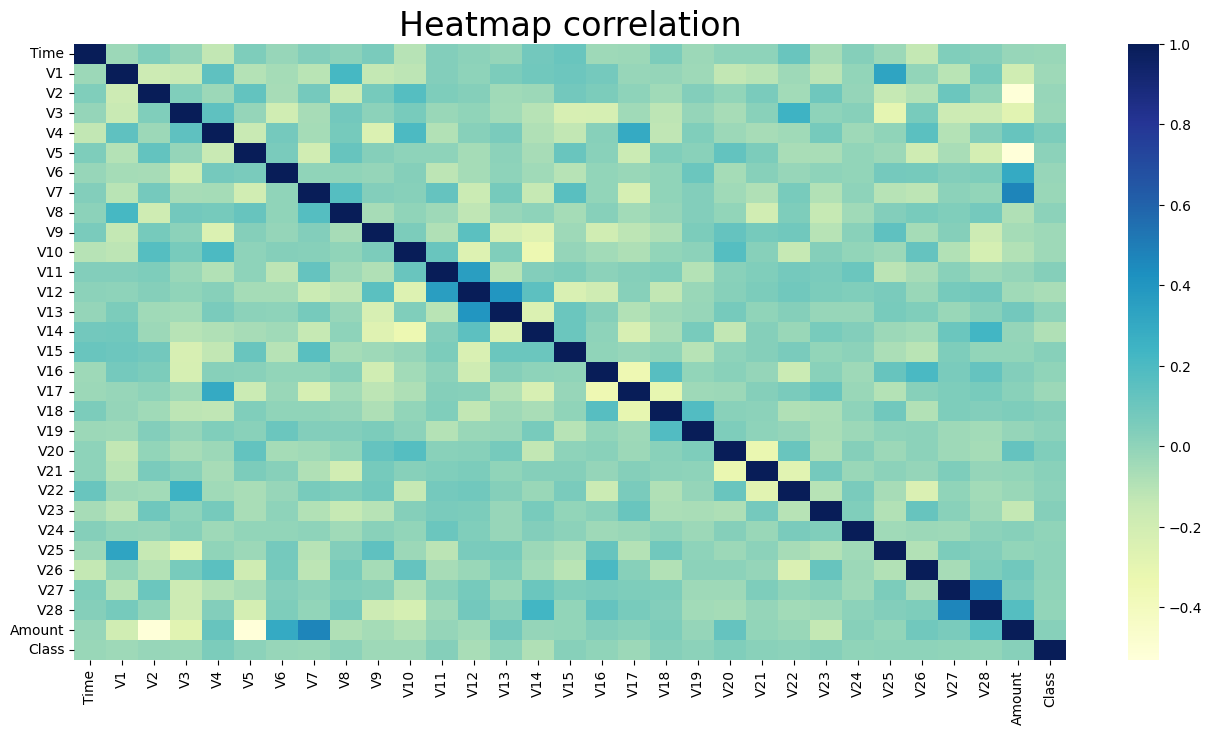

In [11]:
import seaborn
plt.figure(figsize=(16,8))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [12]:
Fraud = df[df['Class']==1]
Normal = df[df['Class']==0]

In [13]:
pd.concat([Normal.Amount.describe(), Normal.Time.describe()],  axis=1)

,Amount,Time
count,3970.000000,3970.000000
mean,64.899597,1638.828463
std,213.612570,1016.116165
min,0.000000,0.000000
25%,2.270000,751.000000
50%,12.990000,1526.500000
75%,54.990000,2525.500000
max,7712.430000,3623.000000


In [14]:
pd.concat([Fraud.Amount.describe(), Fraud.Time.describe()],  axis=1)

,Amount,Time
count,2.000000,2.000000
mean,264.500000,439.000000
std,374.059487,46.669048
min,0.000000,406.000000
25%,132.250000,422.500000
50%,264.500000,439.000000
75%,396.750000,455.500000
max,529.000000,472.000000


In [15]:
print('Fraud Shape:\t', Fraud.shape)
print('Normal Shape:\t', Normal.shape)

Fraud Shape:	 (2, 31)
Normal Shape:	 (3970, 31)


In [16]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['amount_scale'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['time_scale'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [17]:
amount_scale = df['amount_scale']
time_scale = df['time_scale']

df.drop(['amount_scale', 'time_scale'], axis=1, inplace=True)
df.insert(0, 'amount_scale', amount_scale)
df.insert(1, 'time_scale', time_scale)

df.head()

,amount_scale,time_scale,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.591370,-0.859234,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.195353,-0.859234,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,6.935420,-0.858671,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,2.095970,-0.858671,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,1.081081,-0.858108,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [19]:
df = df.sample(frac=1)

fraud = df.loc[df['Class'] == 1]
normal = df.loc[df['Class'] == 0][:492]

normal_distributed_data = pd.concat([fraud, normal])

sample_data = normal_distributed_data.sample(frac=1, random_state=42)
sample_data.head(2)

,amount_scale,time_scale,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
2776,-0.208819,0.444820,-0.721031,1.254617,1.591558,-0.038625,-0.052737,-0.439092,0.397260,-0.762254,...,-0.078136,0.589750,-0.635110,0.151003,0.381910,-0.273279,0.085161,0.321774,0.129507,0.0
1894,-0.229493,-0.034347,-0.869764,1.172497,0.786110,0.782134,0.362308,-0.895910,0.915683,-0.173067,...,-0.053050,0.161281,0.518572,-0.016787,0.529791,-0.110249,-0.343246,-0.007519,0.229843,0.0


In [20]:
sample_data.shape

(494, 31)

In [21]:
X = sample_data.drop('Class', axis=1)
y = sample_data['Class']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.svm import SVC
svm_model = SVC()

In [24]:
svm_params = {"C": np.arange(1,10), "kernel":["linear", "rbf"]}

In [25]:
from sklearn.model_selection import GridSearchCV
svm_cv_model = GridSearchCV(svm_model, svm_params, cv=7, n_jobs=-1, verbose=7).fit(X_train, y_train)

Fitting 7 folds for each of 18 candidates, totalling 126 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=7.
  warnings.warn(


In [26]:
svm_cv_model.best_score_

0.9942857142857143

In [27]:
best_params = svm_cv_model.best_params_
print(best_params)

{'C': 1, 'kernel': 'rbf'}


In [28]:
svm = SVC(C = best_params['C'], kernel=best_params['kernel'], probability=True).fit(X_train, y_train)

In [29]:
y_pred_svm = svm.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_svm)

1.0

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm, X_train, y_train, cv=21).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=21.
  warnings.warn(


0.9943977591036415

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       149

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149



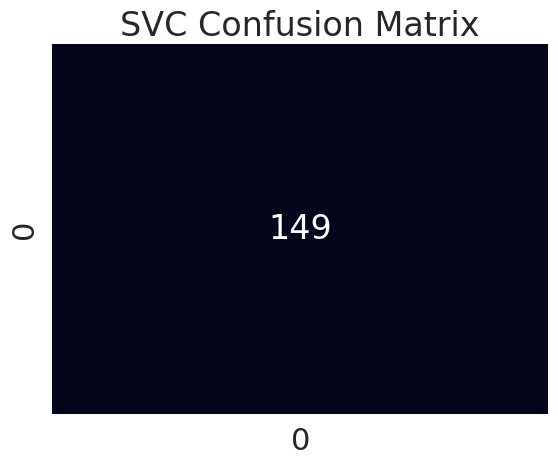

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('SVC Confusion Matrix')
plt.savefig('svc_con_mat')
plt.show()
